# Results from binary classification

In [238]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline
import datetime as dt

We have multiple options for the choice of colors. [Claus O. Wilke](https://clauswilke.com/dataviz/color-pitfalls.html) defines a few colors that are suitable for a wide audience (including people with a color-vision deficiency). 

* orange #E69F00
* sky blue #56B4E9
* bluish green #009E73
* yellow #F0E442
* blue #0072B2
* vermilion #D55E00
* reddish purple #CC79A7
* black #000000

In [2]:
blue = '#0072B2'
bluegreen = '#009E73'
yellow = '#F0E442'
skyblue = '#56B4E9'
orange = '#E69F00'
vermilion = '#D55E00'

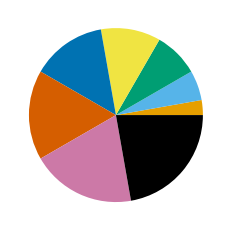

In [3]:
wedges = plt.pie(
    [1,2,3,4,5,6,7,8],
    colors = ["#E69F00",skyblue,"#009E73",yellow,"#0072B2","#D55E00","#CC79A7","#000000"]
)

## Importing shapefiles

First thing we do is to import the NUTS 3 level shapefiles from Eurostat, available at [Eurostat](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts#nuts21).

In [4]:
gdf_nuts3 = gpd.read_file(
    'data/NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
    crs = "EPSG:4326"
)

In [5]:
# Filter out all countries except Norway
gdf_NOnuts3 = gdf_nuts3[gdf_nuts3.CNTR_CODE.str.contains('NO')]
# We manually filter out Svalbard and Jan Mayen as we are not interested in them
gdf_NOnuts3 = gdf_NOnuts3.query('FID != "NO0B1" and FID != "NO0B2"')
# Return to sequential index from 0 to 13
gdf_NOnuts3 = gdf_NOnuts3.reset_index()
# Set the coordinate reference system to EPSG:4326 - same as our twitter data. 
gdf_NOnuts3 = gdf_NOnuts3.to_crs("EPSG:4326")

## Twitter data

We start by simply loading the data from our csv file

In [6]:
df_twitter = pd.read_csv(
    "data/third_rendition_geolocated_anonymous_negneutral_predict.csv",
    parse_dates=[
        'created_at'
    ]
)

### Aggregated temporal analysis

In [7]:
df_twitter_monthly = pd.DataFrame(df_twitter.copy())

In [8]:
df_twitter_monthly.index = df_twitter_monthly[
    'created_at'
].dt.to_period(
    'M'
)

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Number of tweets'>

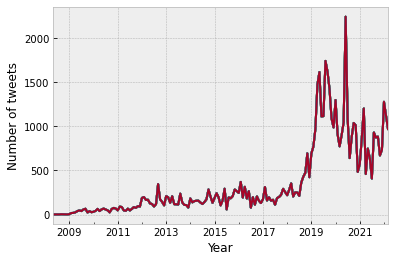

In [9]:
df_twitter_monthly.groupby(
    level=0
).count(
).plot(
    xlabel = 'Year',
    ylabel = 'Number of tweets',
    legend = None,
    #title = 'Number of tweets over time'
)

#plt.savefig('.pdf')

### With sentiment scores
We then caluclate the sentiment score and do analysis. In the binary classification, 0 = negative and 1 = non-negative

In [178]:
df_twitter_monthly_senti = pd.DataFrame(df_twitter.copy())

In [179]:
df_twitter_monthly_senti.index = df_twitter_monthly_senti['created_at'].dt.to_period('M')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [180]:
# We first calculate the total number of values for each months
total_sentiments = df_twitter_monthly_senti.groupby(level=0).count()
total_sentiments

,Unnamed: 0,username,text,loc,created_at,like_count,quote_count,latitude,longitude,label,logits0,logits1,geometry
created_at,,,,,,,,,,,,,
2008-05,1,1,1,1,1,1,1,1,1,1,1,1,1
2008-08,1,1,1,1,1,1,1,1,1,1,1,1,1
2008-09,3,3,3,3,3,3,3,3,3,3,3,3,3
2008-11,2,2,2,2,2,2,2,2,2,2,2,2,2
2008-12,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11,670,670,670,670,670,670,670,670,670,670,670,670,670
2021-12,734,734,734,734,734,734,734,734,734,734,734,734,734
2022-01,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278,1278


In [181]:
# then next, we calculate the sum of the label values, which will correspond to the total amount of non-negative tweets
average_sentiments = df_twitter_monthly_senti.groupby(level=0).sum()
average_sentiments

,Unnamed: 0,username,like_count,quote_count,latitude,longitude,label,logits0,logits1
created_at,,,,,,,,,
2008-05,7,627034,0,0,59.902747,5.298615,1,-2.627769,2.606998
2008-08,6,5635,0,0,59.913330,10.738970,1,-2.316991,1.911707
2008-09,12,2321610,0,0,179.729408,26.776555,3,-5.588559,4.948876
2008-11,3,1362430,0,0,120.788611,10.651838,1,-1.014005,1.220520
2008-12,0,5635,0,0,59.913330,10.738970,1,-1.219448,1.031650
...,...,...,...,...,...,...,...,...,...
2021-11,36009485,311027837,1831,21,40642.638673,6594.497208,494,-538.798765,666.209799
2021-12,39964465,372096514,1935,32,44324.545989,7180.658089,517,-411.515818,571.939871
2022-01,70869573,629328979,4336,79,77179.430812,12143.909558,951,-1106.050147,1359.270492


In [182]:
# 1 = positive, 0 = negative 
# the amount of negative sentiments is calculated by the total amount of sentiments minus the amount of non-negative
# the amount of non-negative is calculated before
df_twitter_monthly_senti['negative_sentiment'] = total_sentiments['label'] - average_sentiments['label']
df_twitter_monthly_senti['non-negative_sentiment'] = average_sentiments['label']

In [183]:
df_twitter_monthly_senti

,Unnamed: 0,username,text,loc,created_at,like_count,quote_count,latitude,longitude,label,logits0,logits1,geometry,negative_sentiment,non-negative_sentiment
created_at,,,,,,,,,,,,,,,
2008-12,0,5635,NYHET: Vil heller vindkraft,Oslo,2008-12-08 07:25:53+00:00,0,0,59.913330,10.738970,1,-1.219448,1.031650,POINT (10.73897 59.91333),0,1
2008-11,1,681215,Vindkraft mulighet : Vindmølleparker vekker st...,Bergen,2008-11-25 05:33:07+00:00,0,0,60.394306,5.325919,0,0.236792,-0.005840,POINT (5.32592 60.39431),1,1
2008-11,2,681215,Vil spreie vindturbinar halve kommunen : Det p...,Bergen,2008-11-18 09:33:01+00:00,0,0,60.394306,5.325919,1,-1.250796,1.226361,POINT (5.32592 60.39431),1,1
2008-09,3,627034,Fitjar i kamp vindm Saman sju andre vindm ..,Fitjar,2008-09-17 16:51:10+00:00,0,0,59.902747,5.298615,1,-1.468212,1.202831,POINT (5.29861 59.90275),0,3
2008-09,4,743983,lyst eget vindkraftverk:,Oslo,2008-09-06 10:16:18+00:00,0,0,59.913330,10.738970,1,-2.378077,2.324068,POINT (10.73897 59.91333),0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03,58181,867560,– Regjeringen en Ole Brumm-tilnærming grønn in...,Oslo,2022-03-28 07:42:08+00:00,10,0,59.913330,10.738970,1,-0.913186,1.232684,POINT (10.73897 59.91333),230,740
2022-03,58182,110160,Fosen vind nær Trondheim Norge bygget Europas ...,Oslo,2022-03-28 07:25:22+00:00,0,0,59.913330,10.738970,0,0.806501,-0.492145,POINT (10.73897 59.91333),230,740
2022-03,58183,33845,Det godt se vinden snur vindturbiner kjernekra...,Odda,2022-03-28 07:14:26+00:00,4,0,60.067925,6.546932,0,2.612614,-2.257843,POINT (6.54693 60.06792),230,740


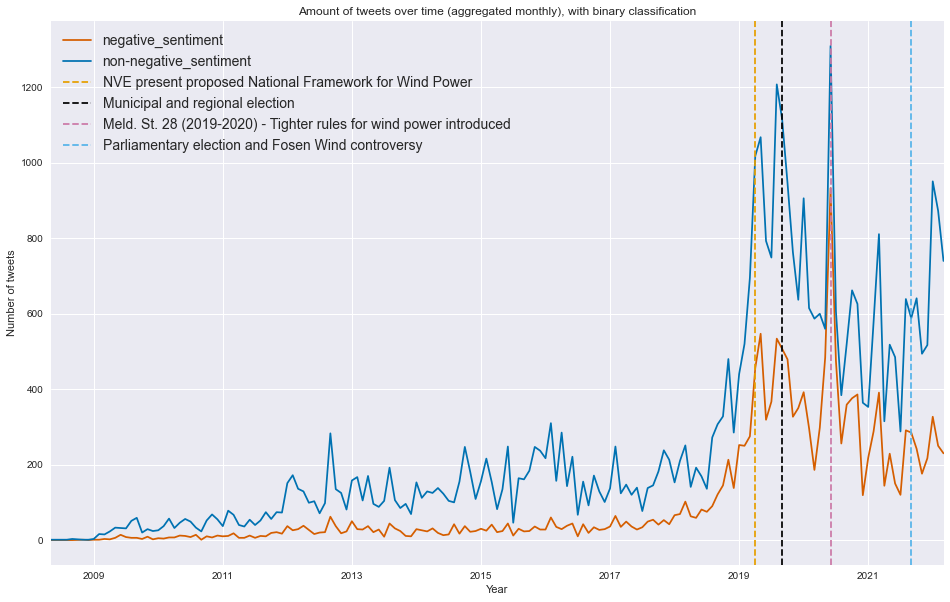

In [257]:
df_twitter_monthly_senti = df_twitter_monthly_senti.rename(columns={'created_at':'year_month'}).sort_values('year_month')
xs = [0,100]
fig, ax = plt.subplots(figsize=(16,10))

df_twitter_monthly_senti.plot(
    ax=ax,
    y = ['negative_sentiment','non-negative_sentiment'],
    title = 'Amount of tweets over time (aggregated monthly), with binary classification',
    color = [vermilion,blue]
)

plt.axvline(
    dt.datetime(2019, 4, 1),
    color="#E69F00",
    label='NVE present proposed National Framework for Wind Power',
    linestyle = "--"
)

plt.axvline(
    dt.datetime(2019, 9, 1),
    color="#000000",
    label='Municipal and regional election',
    linestyle = "--"
)

plt.axvline(
    dt.datetime(2020, 6, 1),
    color="#CC79A7",
    label='Meld. St. 28 (2019-2020) - Tighter rules for wind power introduced',
    linestyle = "--"
)

plt.axvline(
    dt.datetime(2021, 9, 1),
    color="#56B4E9",
    label='Parliamentary election and Fosen Wind controversy',
    linestyle = "--"
)

plt.legend(fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of tweets')
plt.savefig('figures/tweets_over_time_monthly_agg.eps')

In [193]:
# Read the wind power data from NVE
df_wp = pd.read_csv(
    'data/norway_wp_nve.csv'
).groupby(
    'Produksjon oppstart', 
    as_index = False
).sum(
).drop(
    0
).rename(
    columns=
    {
        'Middelproduksjon [GWh]': 'average_generation_GWh',
        'Installert effekt [MW]': 'installed_capacity_MW'
    }
).assign(
    cumulative_annually_average_production_GWh = lambda x: x.average_generation_GWh.cumsum(),
    cumulative_installed_capacity_MW = lambda x: x.installed_capacity_MW.cumsum()
)
    

In [ ]:
s = "20120213"
# you could also import date instead of datetime and use that.
date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))

In [194]:
df_wp_2008 = df_wp.loc[df_wp['Produksjon oppstart'] > 2008]

In [202]:
df_wp_2008

,Produksjon oppstart,installed_capacity_MW,average_generation_GWh,Antall turbiner,Prisområde,cumulative_annually_average_production_GWh,cumulative_installed_capacity_MW
9,2009,2.3,8,1,2.0,1334,474.0
10,2011,73.6,222,32,2.0,1556,547.6
11,2012,315.6,901,123,13.0,2457,863.2
12,2014,45.0,189,15,4.0,2646,908.2
13,2015,15.8,44,8,8.0,2690,924.0
14,2017,324.0,1106,98,8.0,3796,1248.0
15,2018,466.5,1603,130,16.0,5399,1714.5
16,2019,1205.5,4009,306,25.0,9408,2920.0
17,2020,1056.9,3657,250,30.0,13065,3976.9


In [204]:
df_wp_2008['year_dt'] = datetime(year=int(df_wp_2008['Produksjon oppstart']))

TypeError: 'Series' object cannot be interpreted as an integer

In [207]:
df_wp_2008['year_dt'] = pd.to_datetime(df_wp_2008['Produksjon oppstart'], format='%Y')

/tmp/ipykernel_21919/3582138458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wp_2008['year_dt'] = pd.to_datetime(df_wp_2008['Produksjon oppstart'], format='%Y')


In [208]:
df_wp_2008

,Produksjon oppstart,installed_capacity_MW,average_generation_GWh,Antall turbiner,Prisområde,cumulative_annually_average_production_GWh,cumulative_installed_capacity_MW,year_dt
9,2009,2.3,8,1,2.0,1334,474.0,2009-01-01
10,2011,73.6,222,32,2.0,1556,547.6,2011-01-01
11,2012,315.6,901,123,13.0,2457,863.2,2012-01-01
12,2014,45.0,189,15,4.0,2646,908.2,2014-01-01
13,2015,15.8,44,8,8.0,2690,924.0,2015-01-01
14,2017,324.0,1106,98,8.0,3796,1248.0,2017-01-01
15,2018,466.5,1603,130,16.0,5399,1714.5,2018-01-01
16,2019,1205.5,4009,306,25.0,9408,2920.0,2019-01-01
17,2020,1056.9,3657,250,30.0,13065,3976.9,2020-01-01


In [200]:
df_twitter_monthly_senti.year_month

created_at
2008-05   2008-05-30 13:53:27+00:00
2008-08   2008-08-26 05:35:47+00:00
2008-09   2008-09-03 18:58:52+00:00
2008-09   2008-09-06 10:16:18+00:00
2008-09   2008-09-17 16:51:10+00:00
                     ...           
2022-03   2022-03-31 20:15:06+00:00
2022-03   2022-03-31 20:49:31+00:00
2022-03   2022-03-31 20:58:27+00:00
2022-03   2022-03-31 21:52:27+00:00
2022-03   2022-03-31 21:54:40+00:00
Freq: M, Name: year_month, Length: 58186, dtype: datetime64[ns, UTC]

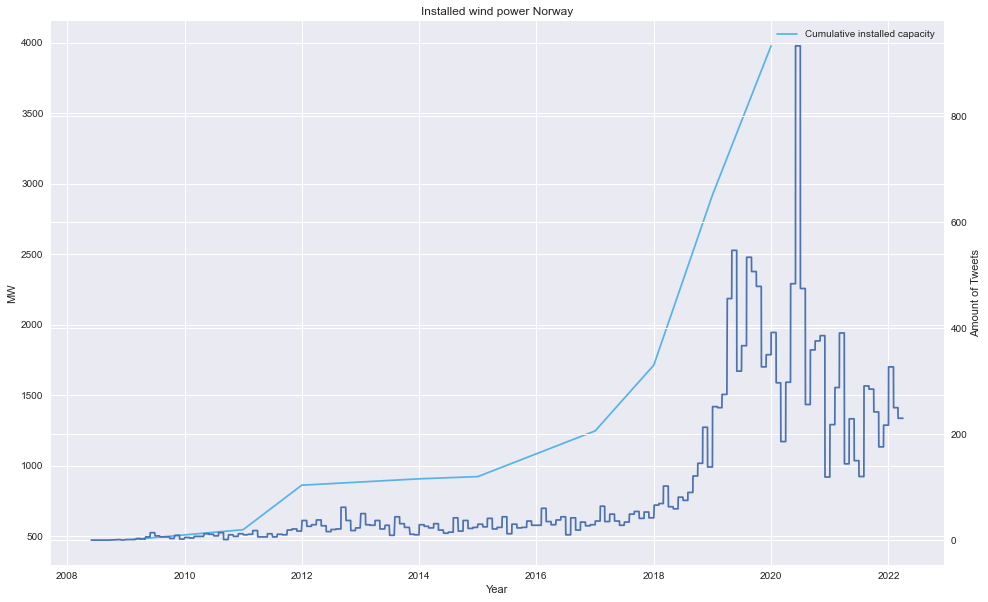

In [219]:
fig, ax1 = plt.subplots(figsize=(16,10))

ax.plot(
    df_wp_2008['year_dt'],
    df_wp_2008.installed_capacity_MW,
    c = '#E69F00',
    label = 'Yearly new installed capacity'
)

ax1.set_xlabel('Year')
ax1.set_ylabel('MW')
ax1.plot(
    df_wp_2008['year_dt'],
    df_wp_2008.cumulative_installed_capacity_MW,
    c = '#56B4E9',
    label = 'Cumulative installed capacity'
)

#ax1.tick_params(axis='y')

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2 = ax1.twiny()

#ax2.plot(
#    df_wp.installed_capacity_MW,
#    c = '#E69F00',
#    label = 'Yearly new installed capacity'
#)
#
#ax2.tick_params(axis='y')

ax3 = ax1.twinx()
ax3.set_ylabel('Amount of Tweets')  # we already handled the x-label with ax1

ax3.plot(
    df_twitter_monthly_senti.year_month,
    df_twitter_monthly_senti.negative_sentiment
    #title = 'Amount of tweets over time (aggregated monthly), with binary classification',
)
ax3.tick_params(axis='y')

ax1.set_title('Installed wind power Norway')
ax1.legend()

### Spatial analysis

In [17]:
# Transform the twitter data it into a GeoDataFrame with point geometry based on longitude and latitude.
gdf_twitter = gpd.GeoDataFrame(
    df_twitter,
    crs = "EPSG:4326",
    geometry=gpd.points_from_xy(
        df_twitter.longitude, 
        df_twitter.latitude
    )
)

In [18]:
gdf_twitter = gdf_twitter.rename(
    columns={
        "loc": "city"
    }
)

In [19]:
# Create a new list with one row for each city
gdf_twitter_grouped = gdf_twitter[gdf_twitter.city != "Longyearbyen"]
gdf_twitter_grouped = gdf_twitter.groupby(
    'city'
).first(
)

In [20]:
# Add a new column 'twitter_frequency' with the number of times each city occur.
# This amounts to the twitter frequency.
gdf_twitter_grouped[
    'twitter_frequency'
] = gdf_twitter[
    'city'
].value_counts(
)

In [21]:
# Only select the relevant columns
gdf_twitter_grouped_sorted = gdf_twitter_grouped[
    [
        "geometry",
        "twitter_frequency",
        "label"
    ]
]
gdf_twitter_grouped_sorted = gdf_twitter_grouped_sorted.reset_index()

In [22]:
gdf_twitter_grouped_sorted

,city,geometry,twitter_frequency,label
0,Adamstuen,POINT (10.73322 59.93345),1,1
1,Agdenes,POINT (9.51508 63.58289),4,0
2,Agder,POINT (8.03496 58.71944),17,1
3,Akershus,POINT (11.32017 60.03852),55,1
4,Alstahaug,POINT (12.43178 65.86742),5,0
...,...,...,...,...
591,Øvre Eiker,POINT (9.84120 59.74419),3,1
592,Øvre Årdal,POINT (7.80398 61.31004),1,1
593,Øyer,POINT (10.50400 61.32735),3,1
594,Øygarden,POINT (7.85664 58.07864),17,0


In [23]:
# Spatial joins https://geopandas.org/docs/user_guide/mergingdata.html#spatial-joins
# Basically, we add an attribute for each city related to the county the coordinate is located inside.
gdf_twitter_with_county = gdf_twitter_grouped_sorted.sjoin(
    gdf_NOnuts3, 
    how = "inner", 
    predicate = 'intersects')

# Summate the different cities within each county
gdf_frequency_county = gdf_twitter_with_county.groupby(
    'NUTS_NAME'
).sum()
gdf_frequency_county.head(5)

,twitter_frequency,label,index_right,index,LEVL_CODE,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
NUTS_NAME,,,,,,,,
Agder,527,18,184,18699,69,46.0,46.0,23
Innlandet,1484,50,315,46935,189,189.0,189.0,189
Møre og Romsdal,897,28,369,61541,123,123.0,123.0,41
Nordland,983,24,360,54072,108,108.0,108.0,36
Oslo,29434,25,192,25344,96,96.0,32.0,32


In [24]:
# https://www.ssb.no/statbank/table/07459/tableViewLayout1/
gdf_frequency_county['population'] = [311134,
                                      371253,
                                      265848,
                                      240190,
                                      699827,
                                      485797,
                                      241736,
                                      474131,
                                      424832,
                                      641292,
                                      1269230]
gdf_frequency_county = gdf_frequency_county.assign(
    tweets_per_cap = lambda x: x.twitter_frequency/x.population
)
gdf_frequency_county

,twitter_frequency,label,index_right,index,LEVL_CODE,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,population,tweets_per_cap
NUTS_NAME,,,,,,,,,,
Agder,527,18,184,18699,69,46.0,46.0,23,311134,0.001694
Innlandet,1484,50,315,46935,189,189.0,189.0,189,371253,0.003997
Møre og Romsdal,897,28,369,61541,123,123.0,123.0,41,265848,0.003374
Nordland,983,24,360,54072,108,108.0,108.0,36,240190,0.004093
Oslo,29434,25,192,25344,96,96.0,32.0,32,699827,0.042059
Rogaland,3707,30,37,26566,111,74.0,74.0,37,485797,0.007631
Troms og Finnmark,620,32,152,27398,114,114.0,114.0,38,241736,0.002565
Trøndelag,5459,39,174,41760,174,116.0,116.0,58,474131,0.011514
Vestfold og Telemark,1036,21,231,26268,99,66.0,66.0,33,424832,0.002439


In [25]:
29434/gdf_frequency_county.twitter_frequency.sum()

0.5382955376737382

In [26]:
699827/gdf_frequency_county.population.sum()

0.12899394868826805

Oslo has almost 54% of the tweets, although only representing 13% of the population

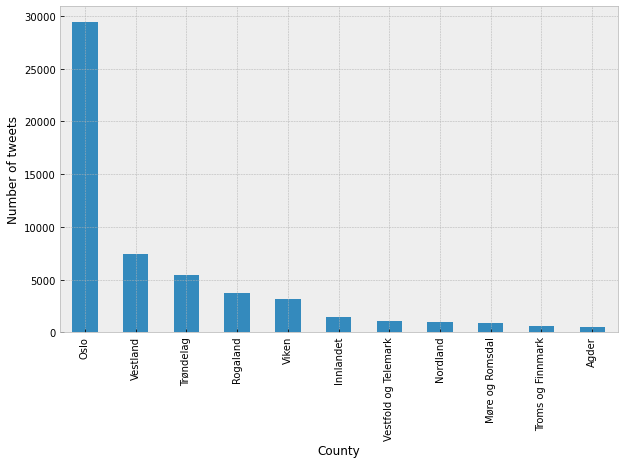

In [27]:
gdf_frequency_county.twitter_frequency.sort_values(
    ascending=False
)

#ax = gdf_frequency_county.tweets_per_cap.plot(
#    secondary_y=True
#)

gdf_frequency_county.twitter_frequency.sort_values(
    ascending=False
).plot.bar(
    legend = None,
    figsize = (10,6),
#    ax=ax
)

#plt.tick_params(axis='y', labelleft='off', labelright='on')
plt.xlabel('County')
plt.ylabel('Number of tweets')
plt.savefig('figures/tweet_frequency.png',bbox_inches='tight')



## Heat maps

In [28]:
test = gdf_twitter.copy()
test = test.drop(columns={'like_count','quote_count','username','text','Unnamed: 0'})

In [29]:
test = test.sjoin(
    gdf_NOnuts3, 
    how="inner", 
    predicate='intersects'
).drop(
    columns={
        'MOUNT_TYPE',
        'URBN_TYPE',
        'COAST_TYPE',
        'FID',
        'LEVL_CODE',
        'CNTR_CODE',
        'NAME_LATN'
    }
)

In [30]:
gdf_twitter_yearly_senti = gpd.GeoDataFrame(test.copy())

In [31]:
gdf_twitter_yearly_senti

,city,created_at,latitude,longitude,label,logits0,logits1,geometry,index_right,index,NUTS_ID,NUTS_NAME
0,Oslo,2008-12-08 07:25:53+00:00,59.913330,10.738970,1,-1.219448,1.031650,POINT (10.73897 59.91333),6,792,NO081,Oslo
4,Oslo,2008-09-06 10:16:18+00:00,59.913330,10.738970,1,-2.378077,2.324068,POINT (10.73897 59.91333),6,792,NO081,Oslo
5,Oslo,2008-09-03 18:58:52+00:00,59.913330,10.738970,1,-1.742271,1.421976,POINT (10.73897 59.91333),6,792,NO081,Oslo
6,Oslo,2008-08-26 05:35:47+00:00,59.913330,10.738970,1,-2.316991,1.911707,POINT (10.73897 59.91333),6,792,NO081,Oslo
10,Oslo,2009-05-26 15:20:20+00:00,59.913330,10.738970,1,-0.778787,1.043555,POINT (10.73897 59.91333),6,792,NO081,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...
57894,Myra,2022-03-23 19:07:34+00:00,58.484920,8.732617,0,0.185767,0.078876,POINT (8.73262 58.48492),8,813,NO092,Agder
57952,Evje og Hornnes,2022-03-26 16:02:36+00:00,58.586054,7.861507,1,-2.344511,1.908541,POINT (7.86151 58.58605),8,813,NO092,Agder
57965,Søgne,2022-03-31 19:14:46+00:00,58.095325,7.789349,1,-2.917803,2.989670,POINT (7.78935 58.09532),8,813,NO092,Agder
57973,Myra,2022-03-31 16:55:49+00:00,58.484920,8.732617,1,-2.602790,2.842143,POINT (8.73262 58.48492),8,813,NO092,Agder


In [32]:
gdf_twitter_yearly_senti['year'] = test['created_at'].dt.to_period('Y')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:>

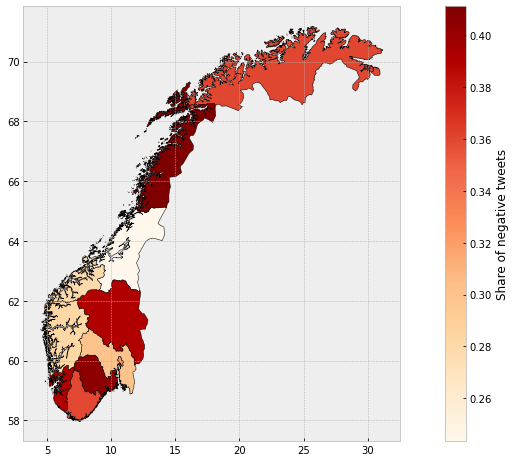

In [33]:
gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
    gdf_twitter_yearly_senti['year'] == "2019"
].groupby("NUTS_NAME").first(
).assign(
    non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == "2019"].groupby("NUTS_NAME").sum().label,
    amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == "2019"].groupby("NUTS_NAME").count().label,
    negative_tweets = lambda x: x.amount - x.non_negative_tweets,
    share_negative = lambda x: x.negative_tweets/x.amount
)

gdf_NOnuts3.merge(
    gdf_twitter_yearly_grouped["share_negative"],
    left_on = 'NUTS_NAME',
    right_on = 'NUTS_NAME'
).plot(
    "share_negative",
    legend = True,
    edgecolor = 'black',
    figsize = (16,8),
    cmap ='OrRd',
    legend_kwds={'label': "Share of negative tweets"}
)

In [34]:
gdf_NOnuts3.merge(
        gdf_twitter_yearly_grouped["share_negative"],
        left_on = 'NUTS_NAME',
        right_on = 'NUTS_NAME'
    ).drop(
    columns = {
        "index",
        "NUTS_ID",
        "LEVL_CODE",
        "CNTR_CODE",
        "NAME_LATN",
        "MOUNT_TYPE",
        "URBN_TYPE",
        "COAST_TYPE",
        "FID",
        "NUTS_NAME"
    }
)

,geometry,share_negative
0,"MULTIPOLYGON (((11.83973 59.84077, 11.85370 59...",0.300319
1,"MULTIPOLYGON (((7.09629 59.78278, 7.11059 59.7...",0.391742
2,"MULTIPOLYGON (((5.49146 62.01479, 5.50093 62.0...",0.282524
3,"MULTIPOLYGON (((14.32598 65.11892, 14.27506 65...",0.243399
4,"MULTIPOLYGON (((31.16727 70.38563, 31.16523 70...",0.360360
5,"POLYGON ((8.25170 61.07394, 8.22705 61.08383, ...",0.391429
6,"MULTIPOLYGON (((10.76479 59.82954, 10.77027 59...",0.323283
7,"MULTIPOLYGON (((10.59606 59.17623, 10.59499 59...",0.405738
8,"MULTIPOLYGON (((7.21467 59.67269, 7.23487 59.6...",0.360000
9,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",0.279167


In [45]:
#years = ['2018','2019','2020','2021']
#for year in years:

fig = plt.figure(
    constrained_layout=False,
    figsize=(20,20)
)
gs = fig.add_gridspec(5,3)

row_nr = 0
column_nr = 0
for year in gdf_twitter_yearly_senti.groupby('year').sum().index:
    gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
        gdf_twitter_yearly_senti['year'] == year
    ].groupby("NUTS_NAME").first(
    ).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )

    gdf_NOnuts3.merge(
        gdf_twitter_yearly_grouped["share_negative"],
        left_on = 'NUTS_NAME',
        right_on = 'NUTS_NAME'
    ).plot(
        ax=fig.add_subplot(gs[row_nr,column_nr]),
        column = "share_negative",
        edgecolor = 'black',
        cmap ='OrRd',
        legend = True,
        legend_kwds={'label': "Share of negative tweets",
        'orientation': "vertical"},  
    )
    
    plt.title(year)
    #plt.savefig('figures/heat_map_'+str(year)+'.eps')
    #plt.close()
    column_nr += 1
    if column_nr == 3:
        column_nr = 0
        row_nr += 1



In [46]:
for year in gdf_twitter_yearly_senti.groupby('year').sum().index:
    gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
        gdf_twitter_yearly_senti['year'] == year
    ].groupby("NUTS_NAME").first(
    ).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )

    gdf_NOnuts3.merge(
        gdf_twitter_yearly_grouped["share_negative"],
        left_on = 'NUTS_NAME',
        right_on = 'NUTS_NAME'
    ).plot(
        column = "share_negative",
        edgecolor = 'black',
        cmap ='OrRd',
        legend = True,
        legend_kwds={'label': "Share of negative tweets",
        'orientation': "vertical"},  
    )
    
    plt.title(year)
    plt.savefig('figures/heat_map_'+str(year)+'.eps')
    plt.close()

<AxesSubplot:>

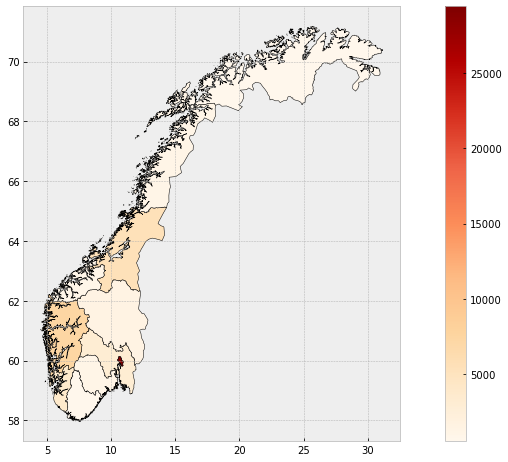

In [48]:
# Add the twitter frequency to the initial shapefile
gdf_plot = gdf_NOnuts3.merge(
    gdf_frequency_county,
    left_on = 'NUTS_NAME',
    right_on = 'NUTS_NAME'
)

# Plot the results
gdf_plot.plot(
    "twitter_frequency",
    legend = True,
    edgecolor = 'black',
    figsize = (16,8),
    cmap ='OrRd'
)
#plt.axis('off')

In [49]:
count = test.groupby('NUTS_NAME').count()

In [50]:
count

,city,created_at,latitude,longitude,label,logits0,logits1,geometry,index_right,index,NUTS_ID
NUTS_NAME,,,,,,,,,,,
Agder,527,527,527,527,527,527,527,527,527,527,527
Innlandet,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484
Møre og Romsdal,897,897,897,897,897,897,897,897,897,897,897
Nordland,983,983,983,983,983,983,983,983,983,983,983
Oslo,29434,29434,29434,29434,29434,29434,29434,29434,29434,29434,29434
Rogaland,3707,3707,3707,3707,3707,3707,3707,3707,3707,3707,3707
Troms og Finnmark,620,620,620,620,620,620,620,620,620,620,620
Trøndelag,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459,5459
Vestfold og Telemark,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036


In [51]:
total = test.groupby('NUTS_NAME').sum()

In [52]:
total

,latitude,longitude,label,logits0,logits1,index_right,index
NUTS_NAME,,,,,,,
Agder,3.073487e+04,3970.536378,424,-631.970835,655.976216,4216,428451
Innlandet,9.043662e+04,16590.366088,1005,-876.590104,1146.396241,7420,1105580
Møre og Romsdal,5.607757e+04,6392.838930,636,-658.362619,782.065911,8073,1346397
Nordland,6.628299e+04,13975.173353,624,-367.851559,534.618754,9830,1476466
Oslo,1.763494e+06,316103.178694,21350,-24590.347128,29151.314731,176604,23311728
Rogaland,2.189131e+05,21524.030916,2509,-2280.300834,2869.571509,3707,2661626
Troms og Finnmark,4.318291e+04,12800.310781,393,-336.622121,417.475996,2480,447020
Trøndelag,3.465005e+05,57597.516394,4050,-5406.957191,6091.336770,16377,3930480
Vestfold og Telemark,6.139072e+04,10130.504688,638,-343.304100,533.947470,7252,824656


In [53]:
new = total.copy()

In [54]:
new['negative_tweets'] = count['label'] - total['label']

In [55]:
new['non_negative_tweets'] = total['label']

In [56]:
new

,latitude,longitude,label,logits0,logits1,index_right,index,negative_tweets,non_negative_tweets
NUTS_NAME,,,,,,,,,
Agder,3.073487e+04,3970.536378,424,-631.970835,655.976216,4216,428451,103,424
Innlandet,9.043662e+04,16590.366088,1005,-876.590104,1146.396241,7420,1105580,479,1005
Møre og Romsdal,5.607757e+04,6392.838930,636,-658.362619,782.065911,8073,1346397,261,636
Nordland,6.628299e+04,13975.173353,624,-367.851559,534.618754,9830,1476466,359,624
Oslo,1.763494e+06,316103.178694,21350,-24590.347128,29151.314731,176604,23311728,8084,21350
Rogaland,2.189131e+05,21524.030916,2509,-2280.300834,2869.571509,3707,2661626,1198,2509
Troms og Finnmark,4.318291e+04,12800.310781,393,-336.622121,417.475996,2480,447020,227,393
Trøndelag,3.465005e+05,57597.516394,4050,-5406.957191,6091.336770,16377,3930480,1409,4050
Vestfold og Telemark,6.139072e+04,10130.504688,638,-343.304100,533.947470,7252,824656,398,638


In [57]:
new = new.drop(columns={
    'latitude',
    'longitude',
    'label',
    'logits0',
    'logits1',
    'index_right',
    'index'
}
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


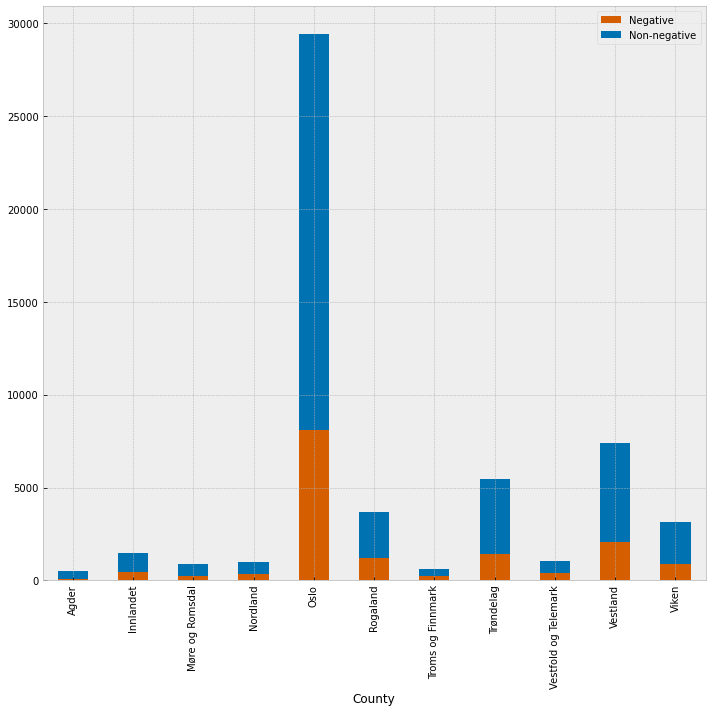

In [58]:
fig, ax = plt.subplots(figsize = (10,10))

new.rename(
    columns={
        "negative_tweets": "Negative",
        "non_negative_tweets": "Non-negative"
    }
).plot.bar(
    ax=ax,
    stacked=True,
    color = [vermilion,blue]
    #title = 'Amount of tweets per county, with sentiment score'
)

plt.tight_layout()
plt.xlabel('County')
plt.savefig('figures/tweets_per_county_sentiment.eps')

In [59]:
new2 = new.copy()

In [60]:
new2['share_negative'] = new['negative_tweets']/(new['negative_tweets'] + new['non_negative_tweets'])
new2['share_non_negative'] = new['non_negative_tweets']/(new['negative_tweets'] + new['non_negative_tweets'])

In [61]:
new2.drop(
    columns={
        'negative_tweets',
        'non_negative_tweets'
    }
).sort_values('share_negative', ascending=False)

,share_negative,share_non_negative
NUTS_NAME,,
Vestfold og Telemark,0.384170,0.615830
Troms og Finnmark,0.366129,0.633871
Nordland,0.365209,0.634791
Rogaland,0.323172,0.676828
Innlandet,0.322776,0.677224
Møre og Romsdal,0.290970,0.709030
Vestland,0.279892,0.720108
Viken,0.276657,0.723343
Oslo,0.274648,0.725352


In [62]:
my_tuple = (1,2)

In [63]:
x = 1342.1203

In [64]:
round(1342.1203, 0)

1342.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


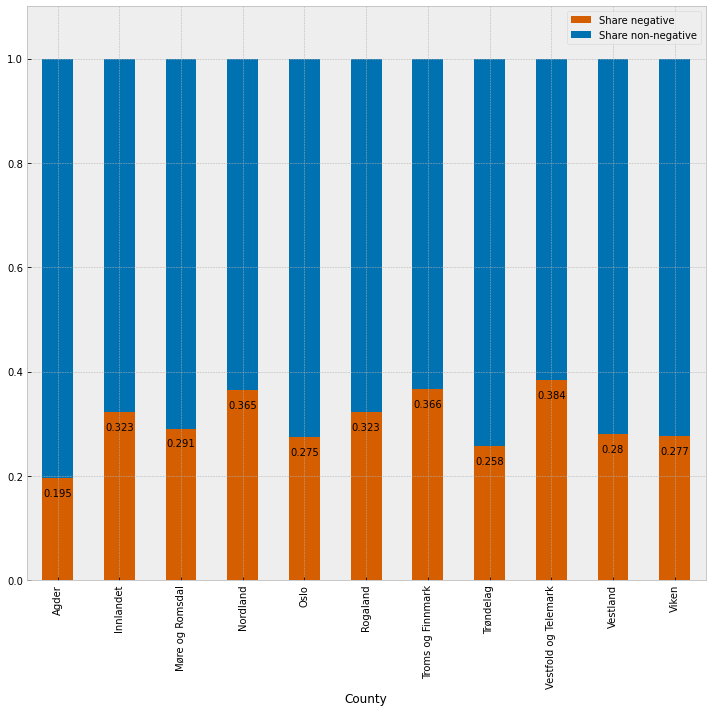

In [66]:
fig, ax=plt.subplots(figsize=(10,10))


new2.drop(
    columns={
        'negative_tweets',
        'non_negative_tweets'
    }
).rename(
    columns={
        "share_negative": "Share negative",
        "share_non_negative": "Share non-negative",
    }
).plot.bar(
    stacked=True,
    ax=ax,
    ylim = [0,1.1],
    color = [vermilion, blue]
)

for container in ax.containers:
    labels = [round(v,3) if v < 0.5 else "" for v in container.datavalues] 
    ax.bar_label(
        container,
        labels = labels,
        padding=-20,
        #color = 'white'
    )

plt.xlabel('County')
plt.tight_layout()
#plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('figures/sentiment_score_county.eps')

### Temporal development per county

In [133]:
gdf_twitter_monthly_senti = gpd.GeoDataFrame(
    df_twitter,
    crs = "EPSG:4326",
    geometry=gpd.points_from_xy(df_twitter.longitude, df_twitter.latitude)
)
gdf_twitter_monthly_senti.index = gdf_twitter_monthly_senti['created_at'].dt.to_period('M')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [134]:
gdf_twitter_monthly_senti = gdf_twitter_monthly_senti.sjoin(
    gdf_NOnuts3, 
    how="inner", 
    predicate='intersects'
)

In [135]:
df_twitter_monthly_senti = pd.DataFrame(gdf_twitter_monthly_senti.drop(
    columns={
        'username',
        'like_count',
        'quote_count',
        'index',
        'LEVL_CODE',
        'CNTR_CODE',
        'NAME_LATN',
        'MOUNT_TYPE',
        'URBN_TYPE',
        'COAST_TYPE',
        'index_right',
        'text',
        'FID',
        'logits0',
        'logits1',
        'latitude',
        'longitude',
        'geometry',
        'NUTS_ID',
        'Unnamed: 0',
        'loc'
    }
))

In [136]:
df_twitter_monthly_senti

,created_at,label,NUTS_NAME
created_at,,,
2008-12,2008-12-08 07:25:53+00:00,1,Oslo
2008-09,2008-09-06 10:16:18+00:00,1,Oslo
2008-09,2008-09-03 18:58:52+00:00,1,Oslo
2008-08,2008-08-26 05:35:47+00:00,1,Oslo
2009-05,2009-05-26 15:20:20+00:00,1,Oslo
...,...,...,...
2022-03,2022-03-23 19:07:34+00:00,0,Agder
2022-03,2022-03-26 16:02:36+00:00,1,Agder
2022-03,2022-03-31 19:14:46+00:00,1,Agder


In [137]:
df_twitter_monthly_senti = df_twitter_monthly_senti.drop(columns={'created_at'})

In [138]:
df_twitter_monthly_senti

,label,NUTS_NAME
created_at,,
2008-12,1,Oslo
2008-09,1,Oslo
2008-09,1,Oslo
2008-08,1,Oslo
2009-05,1,Oslo
...,...,...
2022-03,0,Agder
2022-03,1,Agder
2022-03,1,Agder


Test case with Agder

In [139]:
df_Agder = df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == 'Agder']

<AxesSubplot:xlabel='created_at'>

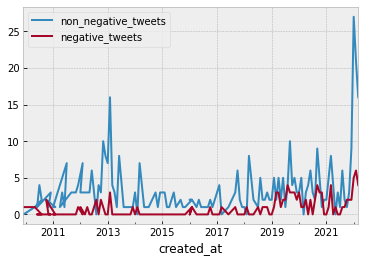

In [140]:
df_Agder.assign(
    non_negative_tweets=lambda x: x.groupby(level=0).sum()
).assign(
    amount=lambda x: x.groupby(level=0).count().label
).assign(
    negative_tweets=lambda x: x.amount - x.non_negative_tweets
).drop(columns={
    'amount',
    'label'
}
  ).plot(
)

In [141]:
counties = ['Agder',
            'Innlandet',
            'Møre og Romsdal',
            'Nordland',
            'Oslo',
            'Rogaland',
           'Troms og Finnmark',
            'Trøndelag',
            'Vestfold og Telemark',
            'Vestland',
            'Viken'
           ]

In [142]:
for county in counties:
    print(county.replace(" ", ""))

Agder
Innlandet
MøreogRomsdal
Nordland
Oslo
Rogaland
TromsogFinnmark
Trøndelag
VestfoldogTelemark
Vestland
Viken


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


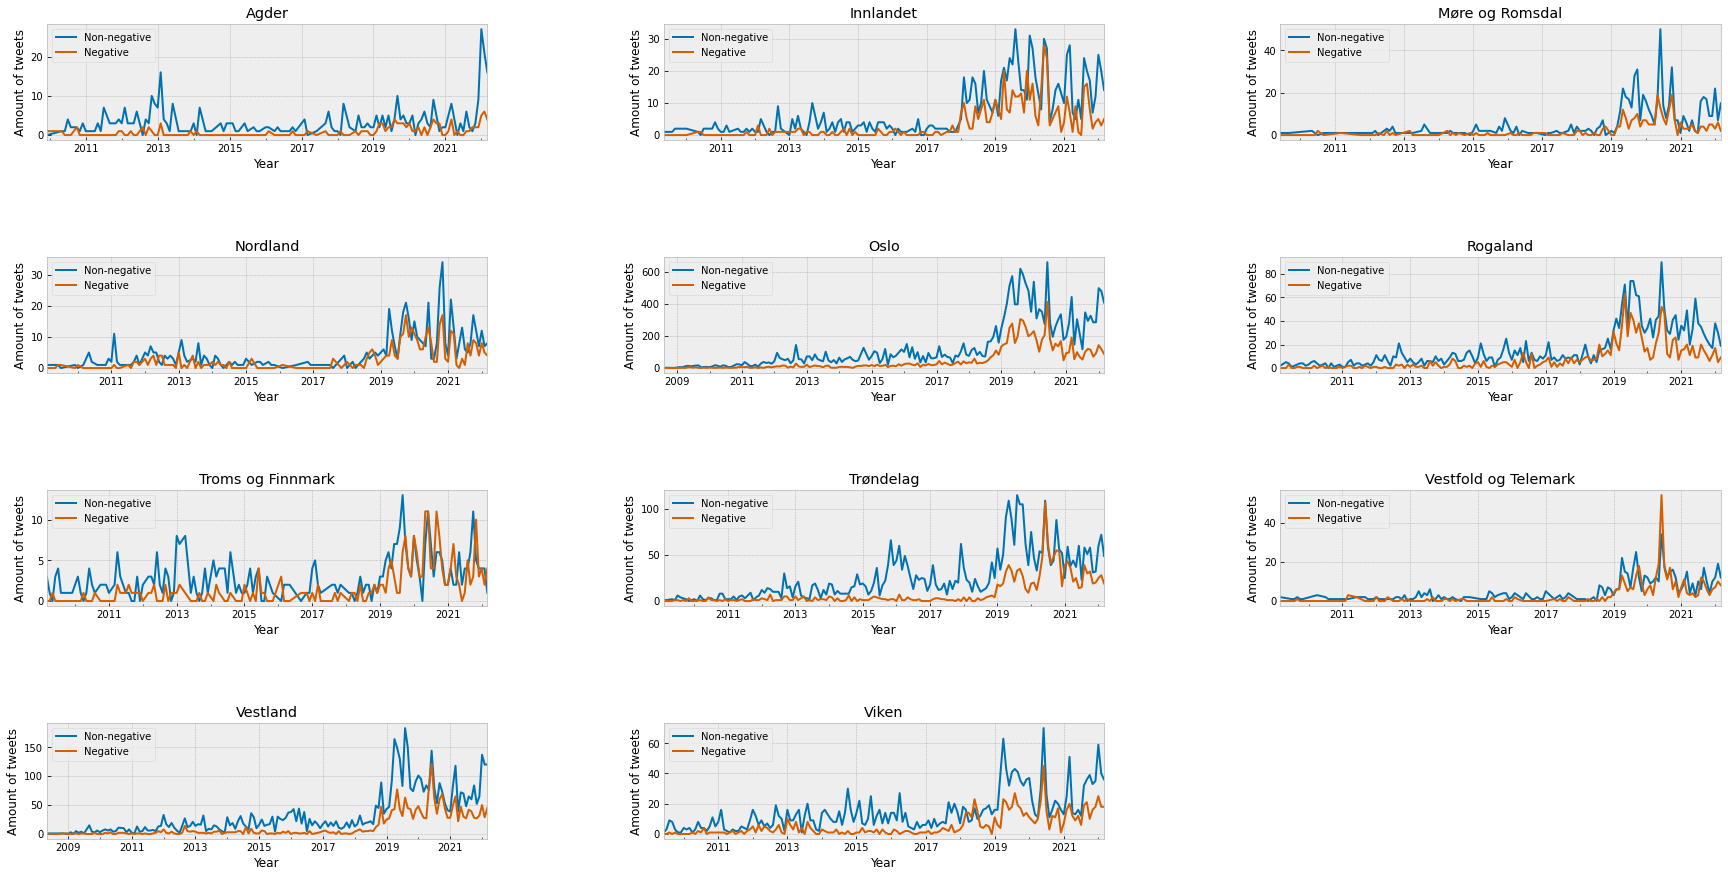

In [143]:
row_nr = 0
column_nr = 0
fig = plt.figure(
    constrained_layout=False,
    figsize=(30,15)
)
gs = fig.add_gridspec(4,3, wspace=0.4, hspace = 1)

for county in counties:
    df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == county].assign(
        non_negative_tweets=lambda x: x.groupby(level=0).sum()
    ).assign(
        amount=lambda x: x.groupby(level=0).count().label
    ).assign(
        negative_tweets=lambda x: x.amount - x.non_negative_tweets
    ).drop(columns={
        'amount',
        'label'
    }
      ).rename(
    columns={
        "negative_tweets": "Negative",
        "non_negative_tweets": "Non-negative"
    }
    ).sort_values(
        'created_at'
    ).plot(
        ax=fig.add_subplot(gs[row_nr,column_nr]),
        title = county,
        color = [blue,vermilion]
    )
    column_nr += 1
    if column_nr == 3:
        column_nr = 0
        row_nr += 1
    plt.xlabel('Year')
    plt.ylabel('Amount of tweets')

plt.savefig('figures/temporal_all_counties.eps')

In [144]:
for county in counties:
    df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == county].assign(
        non_negative_tweets=lambda x: x.groupby(level=0).sum()
    ).assign(
        amount=lambda x: x.groupby(level=0).count().label
    ).assign(
        negative_tweets=lambda x: x.amount - x.non_negative_tweets
    ).drop(columns={
        'amount',
        'label'
    }
      ).rename(
        columns={
            "negative_tweets": "Negative",
            "non_negative_tweets": "Non-negative"
        }
    ).sort_values(
        'created_at'
    ).plot(
        title = county,
        color = [blue,vermilion] 
    )
    #plt.tight_layout()
    plt.xlabel('Year')
    plt.ylabel('Number of tweets')
    plt.savefig('figures/temporal_new_'+str(county.replace(" ", ""))+'.eps')
    plt.close()
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

## Wild testing

In [79]:
df_twitter_yearly = pd.DataFrame(df_twitter.copy())
df_twitter_yearly.index = df_twitter_yearly['created_at'].dt.to_period('Y')

/home/oskar/miniconda3/envs/oskar/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [80]:
years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

In [81]:
a_list = []
for year in years:
    x = [year, df_twitter_yearly.loc[year].label.mean()]
    a_list.append(x)

In [82]:
df_year_averages = pd.DataFrame(a_list, columns=['year','share_non_negative'])

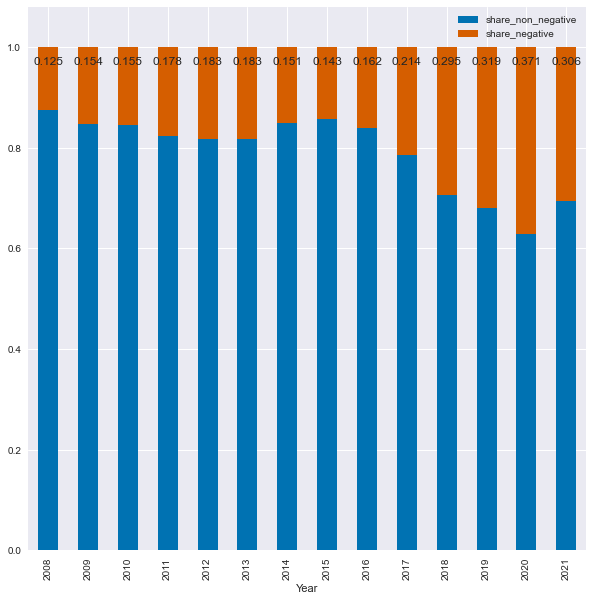

In [230]:
fig, ax=plt.subplots(figsize=(10,10))

#plt.rcParams['font.size'] = '12'

df_year_averages.assign(
    share_negative=lambda x: 1-x.share_non_negative
).set_index(
    'year'
).plot.bar(
    ax=ax,
    stacked=True,
    color = [blue,vermilion]
)
#plt.legend(bbox_to_anchor=(1.0, 1.0))

for container in ax.containers:
    labels = [round(v,3) if v < 0.4 else "" for v in container.datavalues] 
    ax.bar_label(
        container,
        labels = labels,
        padding=-20,
        #color = 'white'
    )


plt.ylim([0,1.08])
#plt.tight_layout()
plt.xlabel('Year')
plt.savefig('figures/share_negative_time.eps')

In [90]:
df_year_averages

,year,share_non_negative
0,2008,0.875000
1,2009,0.846348
2,2010,0.844937
3,2011,0.822464
4,2012,0.817243
5,2013,0.816837
6,2014,0.849037
7,2015,0.857264
8,2016,0.838314
9,2017,0.785508


In [ ]:
df_year_averages.assign(
    share_negative=lambda x: 1-x.share_non_negative
).set_index(
    'year'
).plot.bar(
    stacked=True,
    color = [blue,vermilion]
)

Text(0, 0.5, 'Number of tweets')

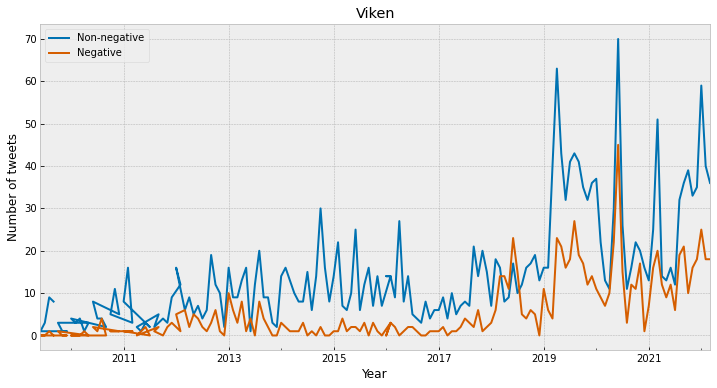

In [89]:
fig = plt.figure(
    constrained_layout=False,
    figsize=(12,6)
)
gs = fig.add_gridspec(1,1, wspace=0.4, hspace = 1)

df_twitter_monthly_senti.loc[df_twitter_monthly_senti['NUTS_NAME'] == county].assign(
        non_negative_tweets=lambda x: x.groupby(level=0).sum()
    ).assign(
        amount=lambda x: x.groupby(level=0).count().label
    ).assign(
        negative_tweets=lambda x: x.amount - x.non_negative_tweets
    ).drop(columns={
        'amount',
        'label'
    }
      ).rename(
        columns={
            "negative_tweets": "Negative",
            "non_negative_tweets": "Non-negative"
        }
    ).plot(
        ax=fig.add_subplot(gs[0,0]),
        title = county,
        color = [blue,vermilion] 
    )
    

plt.xlabel('Year')
plt.ylabel('Number of tweets')

In [102]:
gdf_twitter_yearly_senti

,city,created_at,latitude,longitude,label,logits0,logits1,geometry,index_right,index,NUTS_ID,NUTS_NAME,year
0,Oslo,2008-12-08 07:25:53+00:00,59.913330,10.738970,1,-1.219448,1.031650,POINT (10.73897 59.91333),6,792,NO081,Oslo,2008
4,Oslo,2008-09-06 10:16:18+00:00,59.913330,10.738970,1,-2.378077,2.324068,POINT (10.73897 59.91333),6,792,NO081,Oslo,2008
5,Oslo,2008-09-03 18:58:52+00:00,59.913330,10.738970,1,-1.742271,1.421976,POINT (10.73897 59.91333),6,792,NO081,Oslo,2008
6,Oslo,2008-08-26 05:35:47+00:00,59.913330,10.738970,1,-2.316991,1.911707,POINT (10.73897 59.91333),6,792,NO081,Oslo,2008
10,Oslo,2009-05-26 15:20:20+00:00,59.913330,10.738970,1,-0.778787,1.043555,POINT (10.73897 59.91333),6,792,NO081,Oslo,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57894,Myra,2022-03-23 19:07:34+00:00,58.484920,8.732617,0,0.185767,0.078876,POINT (8.73262 58.48492),8,813,NO092,Agder,2022
57952,Evje og Hornnes,2022-03-26 16:02:36+00:00,58.586054,7.861507,1,-2.344511,1.908541,POINT (7.86151 58.58605),8,813,NO092,Agder,2022
57965,Søgne,2022-03-31 19:14:46+00:00,58.095325,7.789349,1,-2.917803,2.989670,POINT (7.78935 58.09532),8,813,NO092,Agder,2022
57973,Myra,2022-03-31 16:55:49+00:00,58.484920,8.732617,1,-2.602790,2.842143,POINT (8.73262 58.48492),8,813,NO092,Agder,2022


In [101]:
#gdf_spatio_temporal = 
gdf_twitter_yearly_senti.groupby(
    ['NUTS_NAME','year']
).count(
).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )

city  created_at  latitude  longitude  label  logits0  \
NUTS_NAME year                                                          
Agder     2009     1           1         1          1      1        1   
          2010    17          17        17         17     17       17   
          2011    25          25        25         25     25       25   
          2012    57          57        57         57     57       57   
          2013    47          47        47         47     47       47   
...              ...         ...       ...        ...    ...      ...   
Viken     2018   268         268       268        268    268      268   
          2019   626         626       626        626    626      626   
          2020   457         457       457        457    457      457   
          2021   485         485       485        485    485      485   
          2022   196         196       196        196    196      196   

                logits1  geometry  index_right  index  NUTS_ID  \
NUTS_NAME year                                                   
Agder     2009        1         1            1      1        1   
          2010       17        17           17     17       17   
          2011       25        25           25     25       25   
          2012       57        57           57     57       57   
          2013       47        47           47     47       47   
...                 ...       ...          ...    ...      ...   
Viken     2018      268       268          268    268      268   
          2019      626       626          626    626      626   
          2020      457       457          457    457      457   
          2021      485       485          485    485      485   
          2022      196       196          196    196      196   

                non_negative_tweets  amount  negative_tweets  share_negative  
NUTS_NAME year                                                                
Agder     2009                  NaN     NaN              NaN             NaN  
          2010                  NaN     NaN              NaN             NaN  
          2011                  NaN     NaN              NaN             NaN  
          2012                  NaN     NaN              NaN             NaN  
          2013                  NaN     NaN              NaN             NaN  
...                             ...     ...              ...             ...  
Viken     2018                  NaN     NaN              NaN             NaN  
          2019                  NaN     NaN              NaN             NaN  
          2020                  NaN     NaN              NaN             NaN  
          2021                  NaN     NaN              NaN             NaN  
          2022                  NaN     NaN              NaN             NaN  

[156 rows x 15 columns]

In [99]:
gdf_spatio_temporal

NUTS_NAME  year
Agder      2009      1
           2010     17
           2011     25
           2012     57
           2013     47
                  ... 
Viken      2018    268
           2019    626
           2020    457
           2021    485
           2022    196
Name: label, Length: 156, dtype: int64

In [ ]:
for year in gdf_twitter_yearly_senti.groupby('year').sum().index:
    gdf_twitter_yearly_grouped = gdf_twitter_yearly_senti.loc[
        gdf_twitter_yearly_senti['year'] == year
    ].groupby("NUTS_NAME").first(
    ).assign(
        non_negative_tweets = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").sum().label,
        amount = lambda x: gdf_twitter_yearly_senti.loc[gdf_twitter_yearly_senti['year'] == year].groupby("NUTS_NAME").count().label,
        negative_tweets = lambda x: x.amount - x.non_negative_tweets,
        share_negative = lambda x: x.negative_tweets/x.amount
    )